In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_results(sim_type, num_simulacoes = 1000):
    regrets_all = []
    rmse_incremental_list = []
    rmse_arima_list = []

    # Ler a coluna de regrets de cada simulação e calcular RMSE
    for i in range(num_simulacoes):
        try:
            sim_path = f"../data/simulations/{i}/{sim_type}.csv"
            df = pd.read_csv(sim_path)
            
            # Adicionando regrets à lista
            regrets_all.append(df['regrets'].tolist())
            
            # Calcula e adiciona RMSEs às listas, se as colunas existirem
            if {'y_real_nowcast', 'y_pred_incremental_nowcast', 'y_pred_arima_nowcast'}.issubset(df.columns):
                rmse_incremental = sqrt(mean_squared_error(df['y_real_nowcast'], df['y_pred_incremental_nowcast']))
                rmse_arima = sqrt(mean_squared_error(df['y_real_nowcast'], df['y_pred_arima_nowcast']))
                rmse_incremental_list.append(rmse_incremental)
                rmse_arima_list.append(rmse_arima)

        except Exception as e:  # Captura qualquer exceção
            continue

    # Convertendo regrets_all para DataFrame para facilitar os cálculos
    regrets_df = pd.DataFrame(regrets_all).T

    # Calculando os quantis para regrets
    lower_bound = regrets_df.quantile(0.025, axis=1)
    upper_bound = regrets_df.quantile(0.975, axis=1)
    median_regrets = regrets_df.median(axis=1)
    mean_regrets = regrets_df.mean(axis=1)

    x_plot = range(len(lower_bound))

    # Criando DataFrame para RMSE
    rmse_data = pd.DataFrame({
        'Modelo': ['Incremental'] * len(rmse_incremental_list) + ['ARIMA'] * len(rmse_arima_list),
        'RMSE': rmse_incremental_list + rmse_arima_list
    })

    # Retorna tudo necessário, incluindo o DataFrame rmse_data
    return x_plot, lower_bound, upper_bound, median_regrets, mean_regrets, rmse_data

x_plot, lower_bound, upper_bound, median_regrets, mean_regrets, rmse_data = get_results("sim_results_no_drift")

x_plot_abr, lower_bound_abr, upper_bound_abr, median_regrets_abr, mean_regrets_abr, rmse_data_abr = get_results("sim_results_drift_abrupto")

x_plot_incr, lower_bound_incr, upper_bound_incr, median_regrets_incr, mean_regrets_incr, rmse_data_incr = get_results("sim_results_drift_incr")

x_plot_rec, lower_bound_rec, upper_bound_rec, median_regrets_rec, mean_regrets_rec, rmse_data_rec = get_results("sim_results_drift_recor")

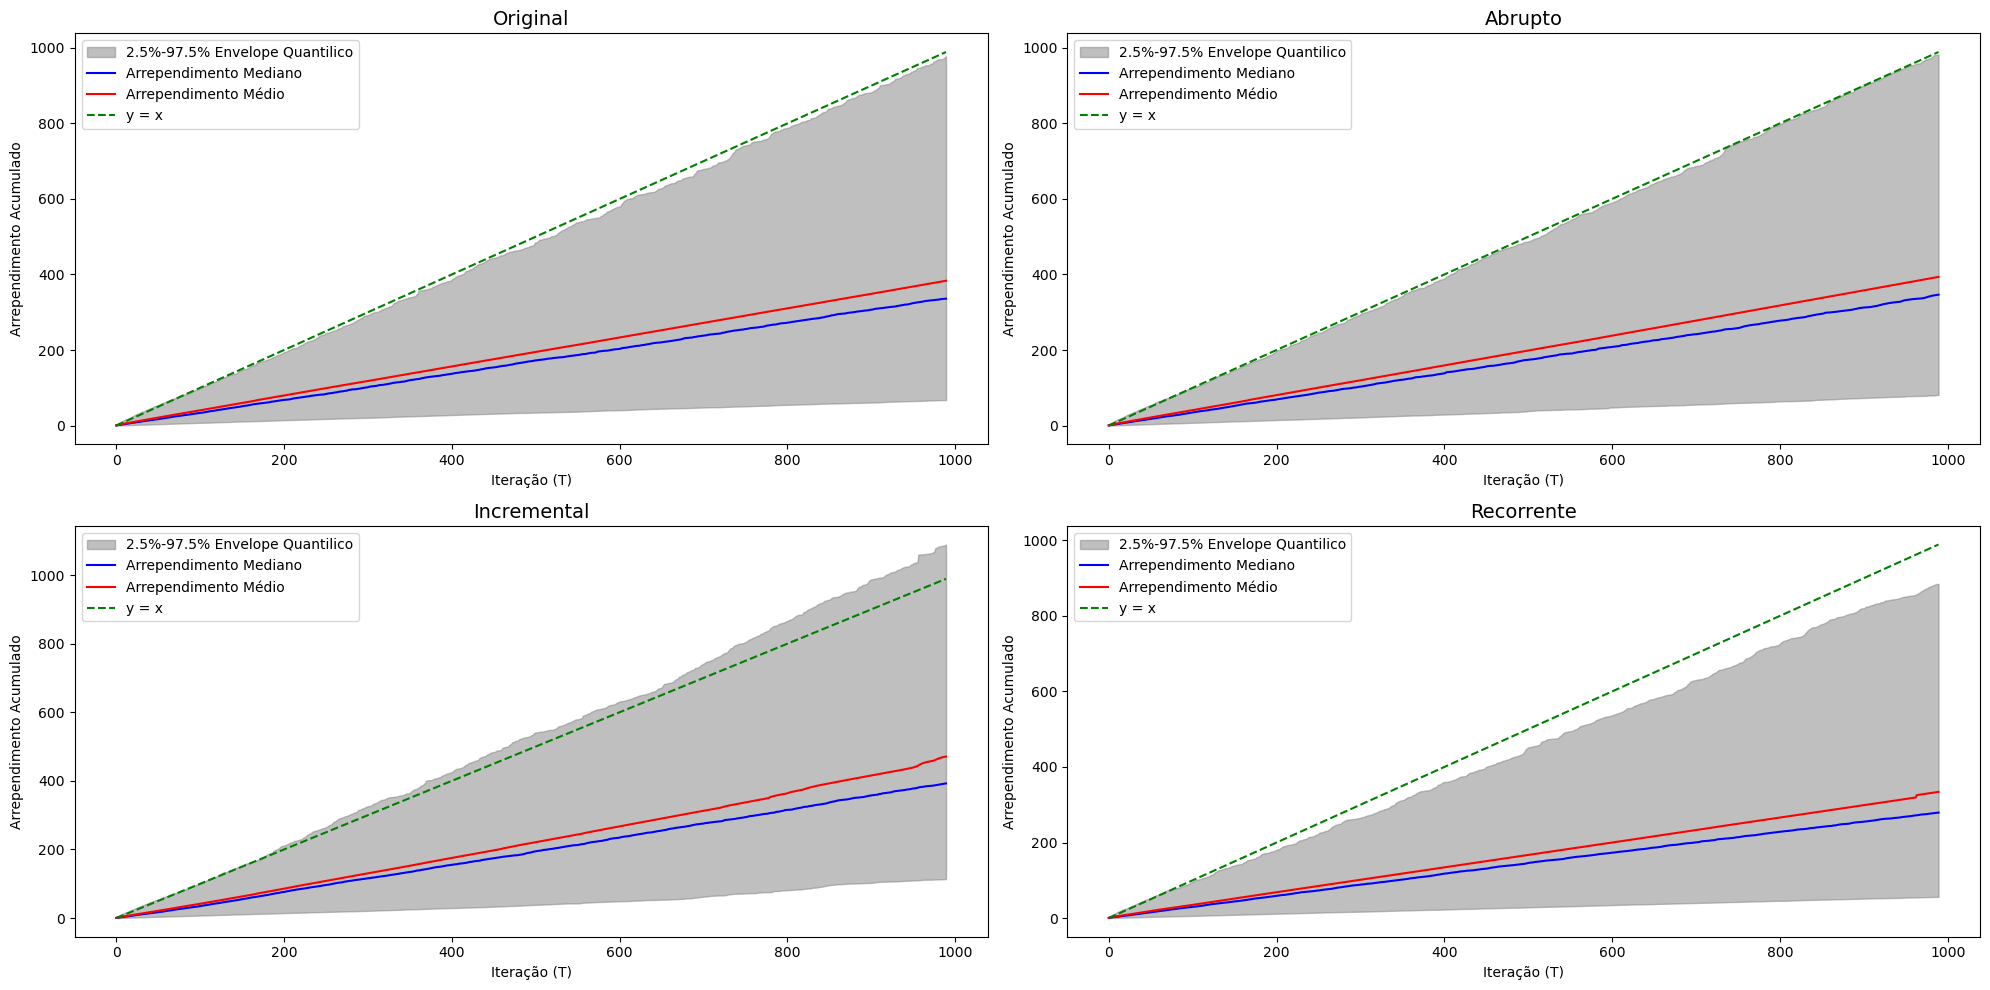

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))  # Cria uma grade de subplots 2x2

# Configurações dos títulos dos subplots
titles = ['Original', 'Abrupto', 'Incremental', 'Recorrente']

# Plotagem do primeiro gráfico
axs[0, 0].fill_between(x_plot, lower_bound, upper_bound, color='gray', alpha=0.5, label='2.5%-97.5% Envelope Quantilico')
axs[0, 0].plot(x_plot, median_regrets, label='Arrependimento Mediano', color='blue')
axs[0, 0].plot(x_plot, mean_regrets, label='Arrependimento Médio', color='red')
axs[0, 0].plot(x_plot, x_plot, label='y = x', color='green', linestyle='--')  # Mudança da cor para 'green' para diferenciar
axs[0, 0].set_xlabel('Iteração (T)')  # Correção aqui
axs[0, 0].set_ylabel('Arrependimento Acumulado')  # Correção aqui
axs[0, 0].legend()
axs[0, 0].set_title(titles[0],fontsize=14)

# Plotagem do primeiro gráfico
axs[0, 1].fill_between(x_plot_abr, lower_bound_abr, upper_bound_abr, color='gray', alpha=0.5, label='2.5%-97.5% Envelope Quantilico')
axs[0, 1].plot(x_plot_abr, median_regrets_abr, label='Arrependimento Mediano', color='blue')
axs[0, 1].plot(x_plot_abr, mean_regrets_abr, label='Arrependimento Médio', color='red')
axs[0, 1].plot(x_plot_abr, x_plot_abr, label='y = x', color='green', linestyle='--')  # Mudança da cor para 'green' para diferenciar
axs[0, 1].set_xlabel('Iteração (T)')  # Correção aqui
axs[0, 1].set_ylabel('Arrependimento Acumulado')  # Correção aqui
axs[0, 1].legend()
axs[0, 1].set_title(titles[1],fontsize=14)

# Plotagem do primeiro gráfico
axs[1, 0].fill_between(x_plot_incr, lower_bound_incr, upper_bound_incr, color='gray', alpha=0.5, label='2.5%-97.5% Envelope Quantilico')
axs[1, 0].plot(x_plot_incr, median_regrets_incr, label='Arrependimento Mediano', color='blue')
axs[1, 0].plot(x_plot_incr, mean_regrets_incr, label='Arrependimento Médio', color='red')
axs[1, 0].plot(x_plot_incr, x_plot_incr, label='y = x', color='green', linestyle='--')  # Mudança da cor para 'green' para diferenciar
axs[1, 0].set_xlabel('Iteração (T)')  # Correção aqui
axs[1, 0].set_ylabel('Arrependimento Acumulado')  # Correção aqui
axs[1, 0].legend()
axs[1, 0].set_title(titles[2],fontsize=14)

# Plotagem do primeiro gráfico
axs[1, 1].fill_between(x_plot_rec, lower_bound_rec, upper_bound_rec, color='gray', alpha=0.5, label='2.5%-97.5% Envelope Quantilico')
axs[1, 1].plot(x_plot_rec, median_regrets_rec, label='Arrependimento Mediano', color='blue')
axs[1, 1].plot(x_plot_rec, mean_regrets_rec, label='Arrependimento Médio', color='red')
axs[1, 1].plot(x_plot_rec, x_plot_rec, label='y = x', color='green', linestyle='--')  # Mudança da cor para 'green' para diferenciar
axs[1, 1].set_xlabel('Iteração (T)')  # Correção aqui
axs[1, 1].set_ylabel('Arrependimento Acumulado')  # Correção aqui
axs[1, 1].legend()
axs[1, 1].set_title(titles[3],fontsize=14)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Salvar a figura
plt.savefig('../imagens/sim_results.png')

plt.show()

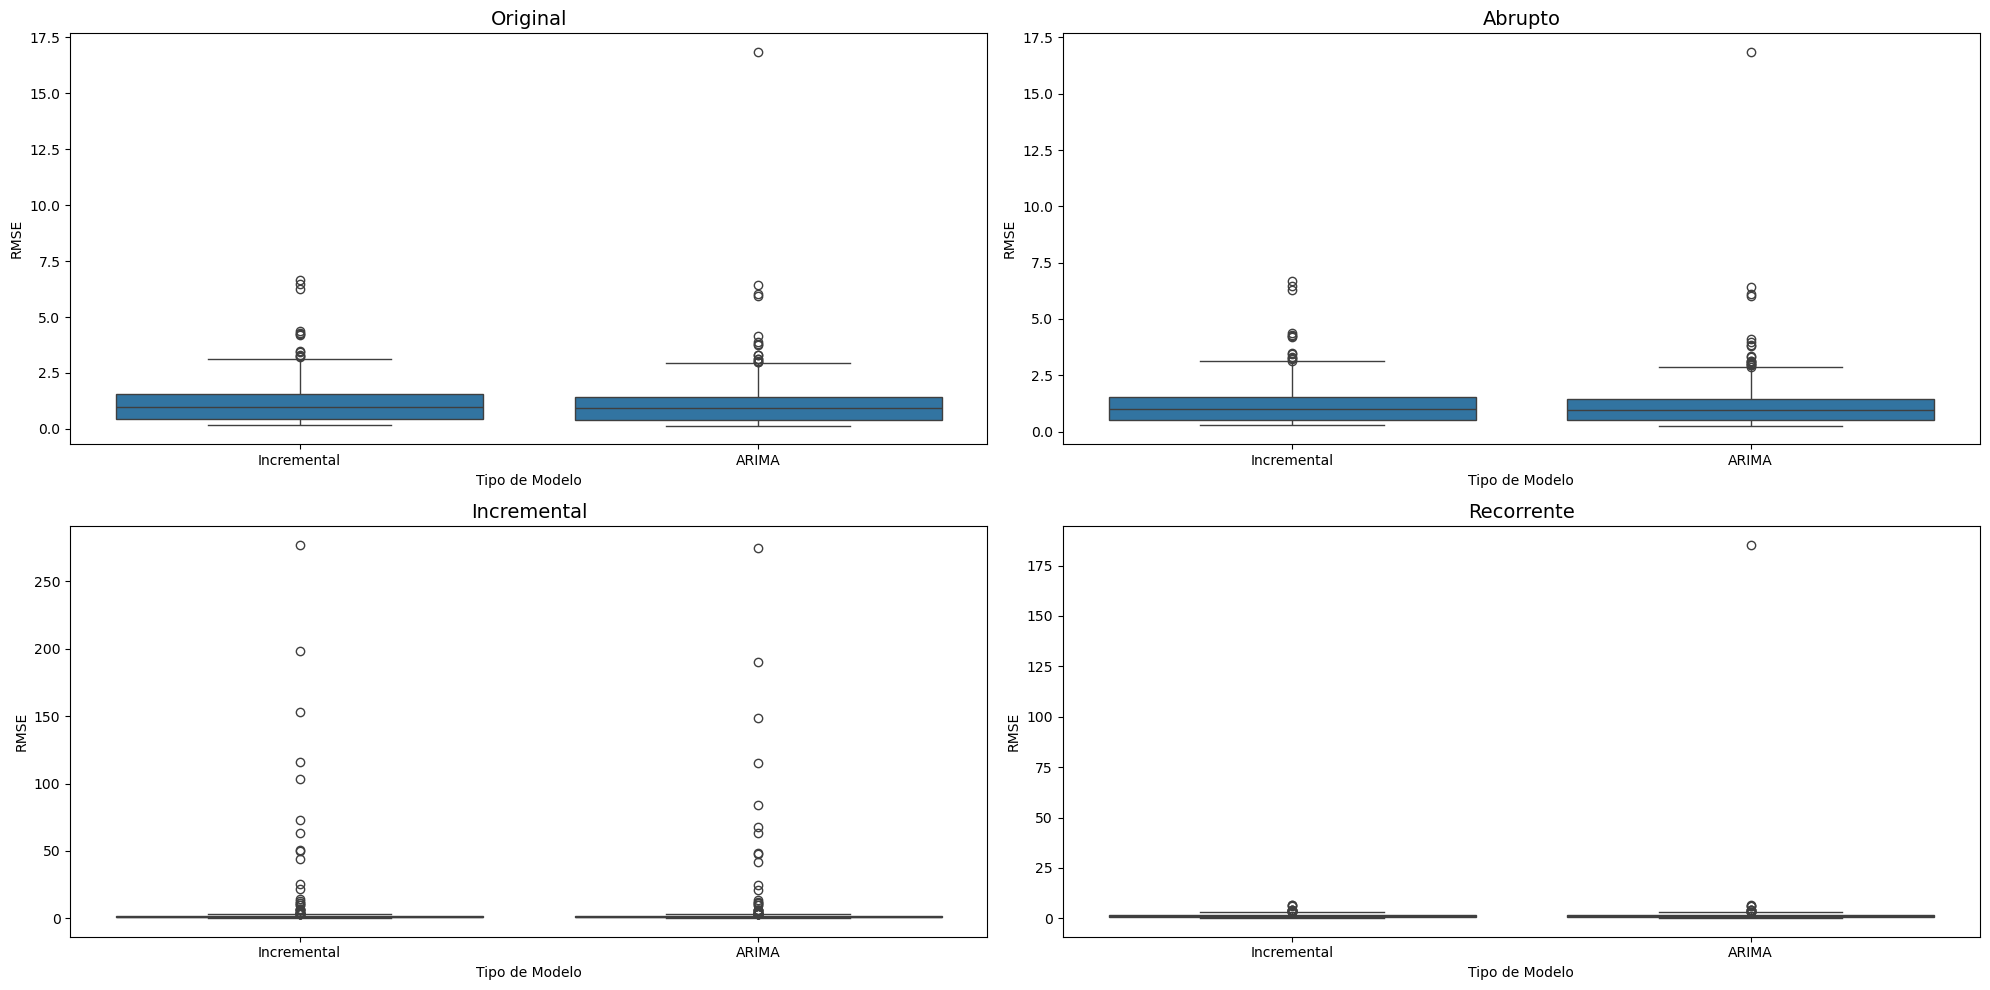

In [4]:
# Cria uma grade de subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Configurações dos títulos dos subplots
titles = ['Original', 'Abrupto', 'Incremental', 'Recorrente']

# Lista de DataFrames de RMSE para iteração
rmse_datas = [rmse_data, rmse_data_abr, rmse_data_incr, rmse_data_rec]

# Iterando sobre os subplots e seus respectivos títulos e dados
for ax, title, data in zip(axs.flat, titles, rmse_datas):
    sns.boxplot(x='Modelo', y='RMSE', data=data, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Tipo de Modelo')  # Corrigindo para o contexto
    ax.set_ylabel('RMSE')  # Ajuste para o contexto de RMSE

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Salvar a figura
plt.savefig('../imagens/rmse_results.png')

plt.show()

# Dados ebsp

In [4]:
df_arima = pd.read_csv("../data/results/arima.csv")
df_arima_incr = pd.read_csv("../data/results/arima_incr.csv", index_col=0)[9:].reset_index(drop = True)
df = pd.merge(df_arima, df_arima_incr, on = ["t", "price"], how = "left")
# Arredondando 'incr_nowcast' para 2 casas decimais
df['incr_nowcast'] = df['incr_nowcast'].round(2)
# Convertendo 'incr_error' para valores absolutos e arredondando para 2 casas decimais
df['incr_error'] = df['incr_error'].abs().round(2)
df['incr_rmse'] = df['incr_rmse'].abs().round(2)
df['t'] = pd.to_datetime(df['t'])
df["dif_erro"] = df["incr_error"]-df["arima_erro_absoluto"]
df['returns'] = df['price'].pct_change()
print(df_arima.head(1))
print(df_arima_incr.head(1))
print(df.head(1))

            t  price  forecast  arima_erro_absoluto
0  1987-06-03  18.75      18.6                 0.15
            t  price  incr_nowcast  incr_error  incr_rmse
0  1987-06-03  18.75     18.684411    0.065589    0.08893
           t  price  forecast  arima_erro_absoluto  incr_nowcast  incr_error  \
0 1987-06-03  18.75      18.6                 0.15         18.68        0.07   

   incr_rmse  dif_erro  returns  
0       0.09     -0.08      NaN  


# Erros Absolutos

In [5]:
# Calculando o MAE para o modelo ARIMA padrão
arima_mae = np.mean(np.abs(df['price'] - df['forecast'])).round(2)
# Calculando o MAE para o modelo incremental
incr_mae = np.mean(np.abs(df['price'] - df['incr_nowcast'])).round(2)

print(f"MAE do modelo ARIMA padrão: {arima_mae}")
print(f"MAE do modelo incremental: {incr_mae}")

MAE do modelo ARIMA padrão: 0.8
MAE do modelo incremental: 0.79


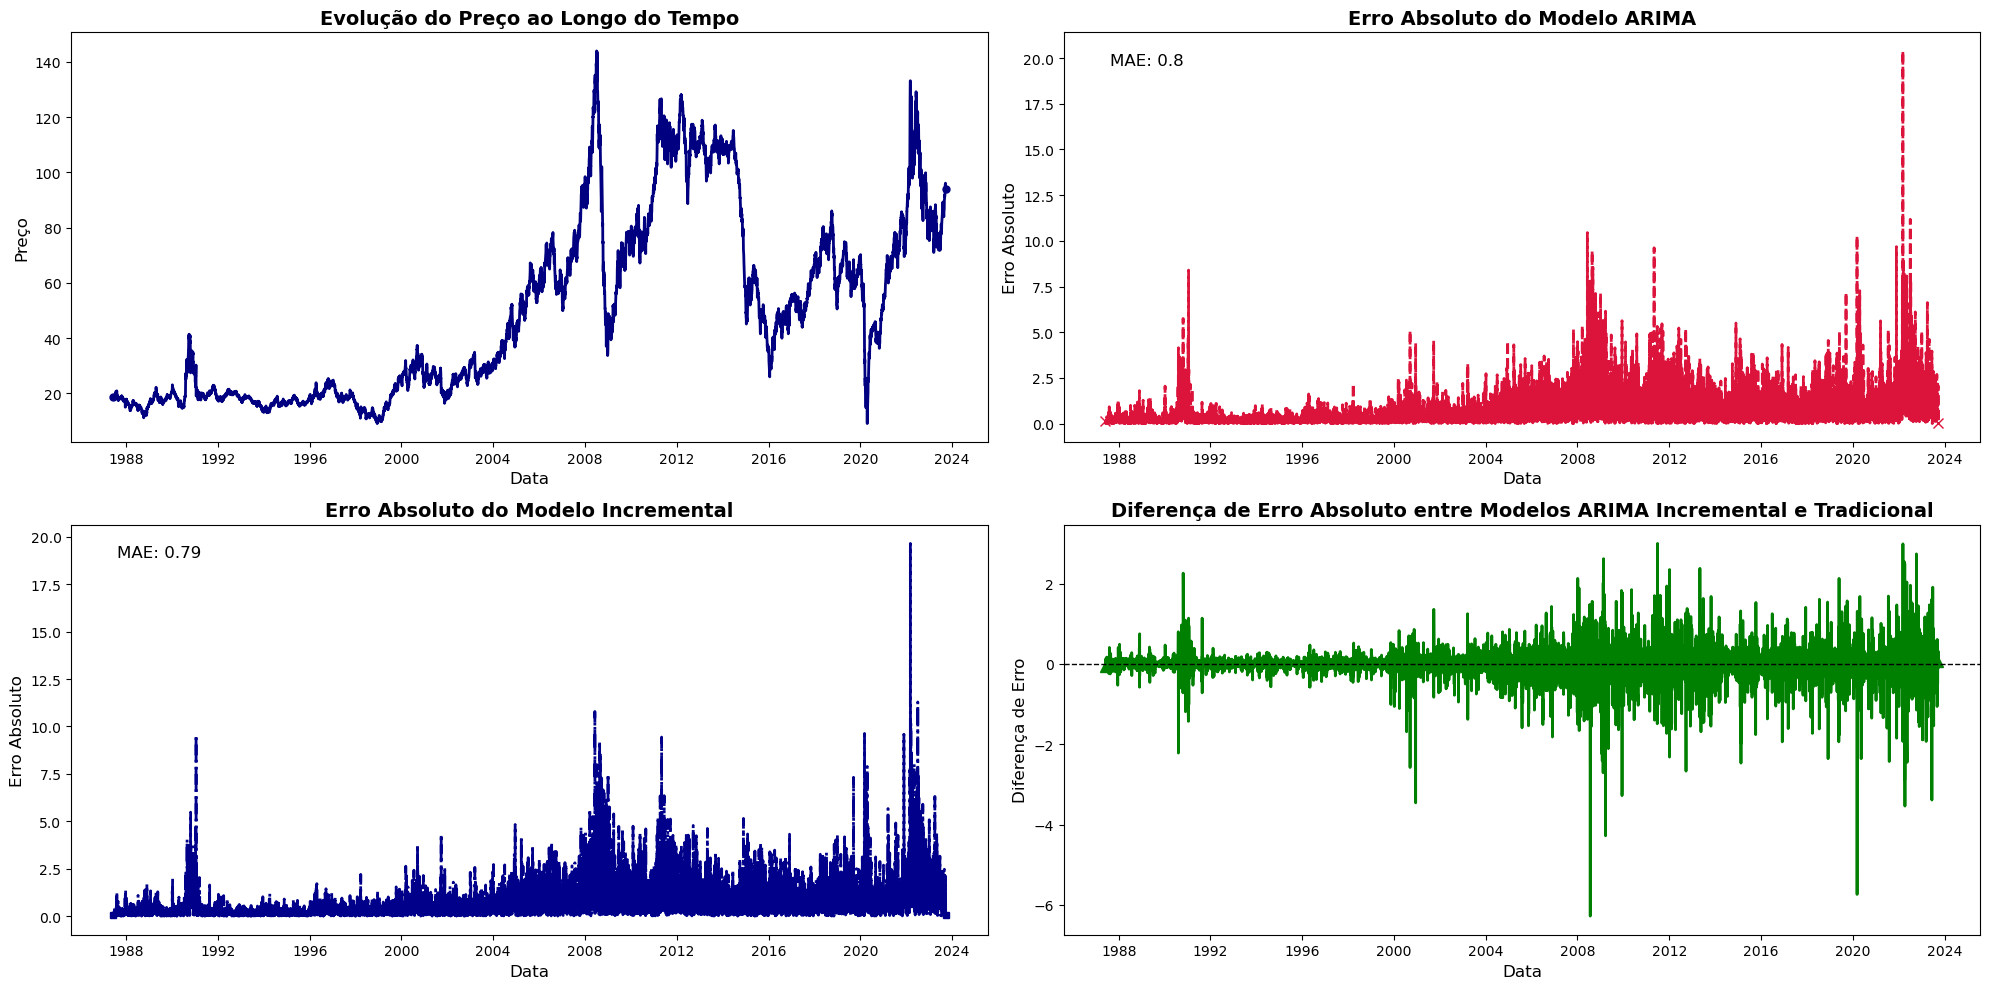

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Figura 1: Preço Real
axs[0, 0].plot(df['t'], df['price'], label='Preço Real', color='navy', linewidth=2, marker='o', markevery=[0, -1], markersize=5)
axs[0, 0].set_xlabel('Data', fontsize=12)
axs[0, 0].set_ylabel('Preço', fontsize=12)
axs[0, 0].set_title('Evolução do Preço ao Longo do Tempo', fontsize=14, fontweight='bold')

# Figura 2: Erro Absoluto ARIMA
axs[0, 1].plot(df['t'], df['arima_erro_absoluto'], label='Erro Absoluto ARIMA', color='crimson', linestyle='--', linewidth=2, marker='x', markevery=[0, -1], markersize=7)
axs[0, 1].set_xlabel('Data', fontsize=12)
axs[0, 1].set_ylabel('Erro Absoluto', fontsize=12)
axs[0, 1].set_title('Erro Absoluto do Modelo ARIMA', fontsize=14, fontweight='bold')
axs[0, 1].text(0.05, 0.95, f'MAE: {arima_mae}', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top')

# Figura 3: Erro Absoluto Incremental
axs[1, 0].plot(df['t'], df['incr_error'], label='Erro Absoluto Incremental', color='darkblue', linestyle='-.', linewidth=2, marker='s', markevery=[0, -1], markersize=5)
axs[1, 0].set_xlabel('Data', fontsize=12)
axs[1, 0].set_ylabel('Erro Absoluto', fontsize=12)
axs[1, 0].set_title('Erro Absoluto do Modelo Incremental', fontsize=14, fontweight='bold')

# Figura 4: Diferença de Erro Absoluto
axs[1, 1].plot(df['t'], df['dif_erro'], label='Diferença de Erro Absoluto', color='green', linestyle='-', linewidth=2, marker='^', markevery=[0, -1], markersize=7)
axs[1, 1].set_xlabel('Data', fontsize=12)
axs[1, 1].set_ylabel('Diferença de Erro', fontsize=12)
axs[1, 1].set_title('Diferença de Erro Absoluto entre Modelos ARIMA Incremental e Tradicional', fontsize=14, fontweight='bold')
axs[1, 0].text(0.05, 0.95, f'MAE: {incr_mae}', transform=axs[1, 0].transAxes, fontsize=12, verticalalignment='top')
axs[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.savefig('../imagens/mae_tempo.png')

plt.tight_layout()
plt.show()


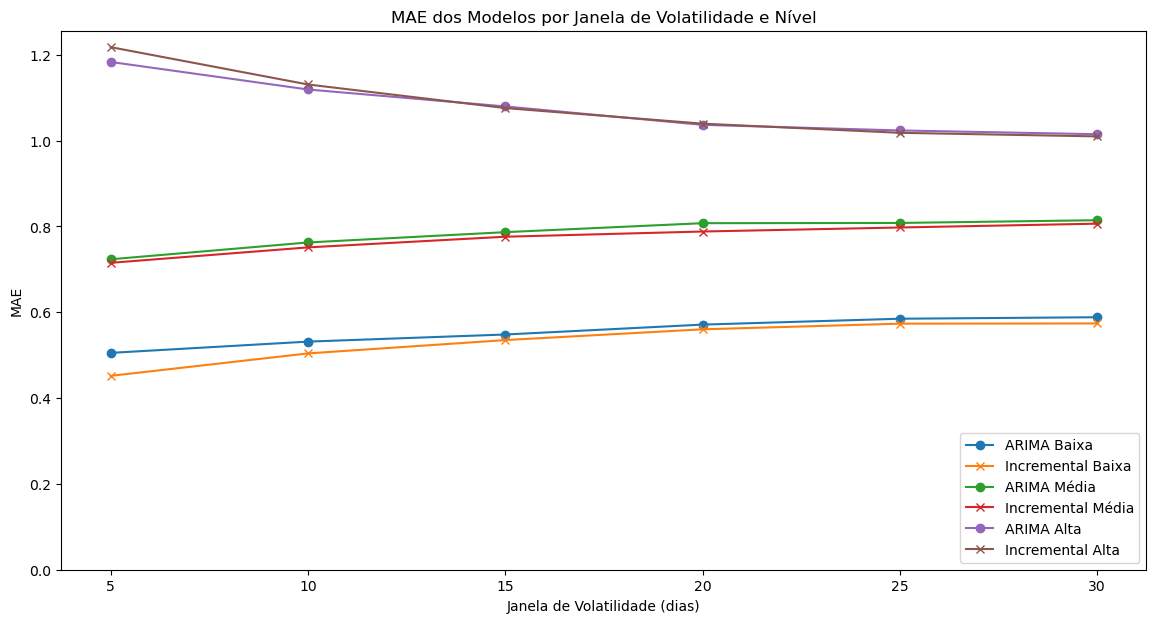

In [7]:
janelas = range(5, 31, 5)  # Janelas de 5 a 30 dias
categorias_vol = ['Baixa', 'Média', 'Alta']  # Categorias de volatilidade
mae_arima = pd.DataFrame(index=janelas, columns=categorias_vol)
mae_incr = pd.DataFrame(index=janelas, columns=categorias_vol)

for janela in janelas:
    df['volatilidade'] = df['returns'].rolling(window=janela).std()
    
    limiar_baixo = df['volatilidade'].quantile(1/3)
    limiar_alto = df['volatilidade'].quantile(2/3)
    
    for categoria in categorias_vol:
        if categoria == 'Baixa':
            df_filtrado = df[df['volatilidade'] <= limiar_baixo]
        elif categoria == 'Média':
            df_filtrado = df[(df['volatilidade'] > limiar_baixo) & (df['volatilidade'] <= limiar_alto)]
        else:  # Alta
            df_filtrado = df[df['volatilidade'] > limiar_alto]
        
        # Calculando MAE para cada modelo e categoria
        mae_arima.loc[janela, categoria] = np.mean(np.abs(df_filtrado['price'] - df_filtrado['forecast']))
        mae_incr.loc[janela, categoria] = np.mean(np.abs(df_filtrado['price'] - df_filtrado['incr_nowcast']))

# Plotando os resultados
plt.figure(figsize=(14, 7))

for categoria in categorias_vol:
    plt.plot(mae_arima.index, mae_arima[categoria], marker='o', label=f'ARIMA {categoria}')
    plt.plot(mae_incr.index, mae_incr[categoria], marker='x', label=f'Incremental {categoria}')

plt.title('MAE dos Modelos por Janela de Volatilidade e Nível')
plt.xlabel('Janela de Volatilidade (dias)')
plt.ylabel('MAE')
plt.gca().set_ylim(bottom=0)  # Ajuste conforme necessário
plt.legend(loc='lower right')

plt.savefig('../imagens/mae_volatilidade.png')

plt.show()

# RMSE

In [8]:
# Calculando o RMSE para o modelo ARIMA padrão
arima_rmse = np.sqrt(np.mean(np.square(df['price'] - df['forecast']))).round(2)

# Calculando o RMSE para o modelo incremental
incr_rmse = np.sqrt(np.mean(np.square(df['price'] - df['incr_nowcast']))).round(2)

print(f"RMSE do modelo ARIMA padrão: {arima_rmse:.2f}")
print(f"RMSE do modelo incremental: {incr_rmse:.2f}")

RMSE do modelo ARIMA padrão: 1.29
RMSE do modelo incremental: 1.28


In [9]:
def calcular_rmse_cumulativo(t, price, forecast):
    # Criando um DataFrame a partir dos vetores
    df = pd.DataFrame({'t': t, 'price': price, 'forecast': forecast})
    
    # Ordenando o DataFrame por 't'
    df.sort_values('t', inplace=True)
    
    # Calculando o erro quadrático
    df['squared_error'] = (df['price'] - df['forecast']) ** 2
    
    # Calculando a soma cumulativa dos erros quadráticos
    df['cumulative_squared_error'] = df['squared_error'].cumsum()
    
    # Calculando o número de observações até cada 't'
    df['count'] = range(1, len(df) + 1)
    
    # Calculando o RMSE cumulativo para cada 't'
    df['rmse_t'] = np.sqrt(df['cumulative_squared_error'] / df['count'])
    
    # Retornando apenas o vetor de RMSE cumulativo
    return df['rmse_t'].values

rmse_arima = calcular_rmse_cumulativo(df["t"], df["price"], df["forecast"])
df["arima_rmse"] = rmse_arima.round(2)
df["dif_rmse"] = df["incr_rmse"]-df["arima_rmse"]

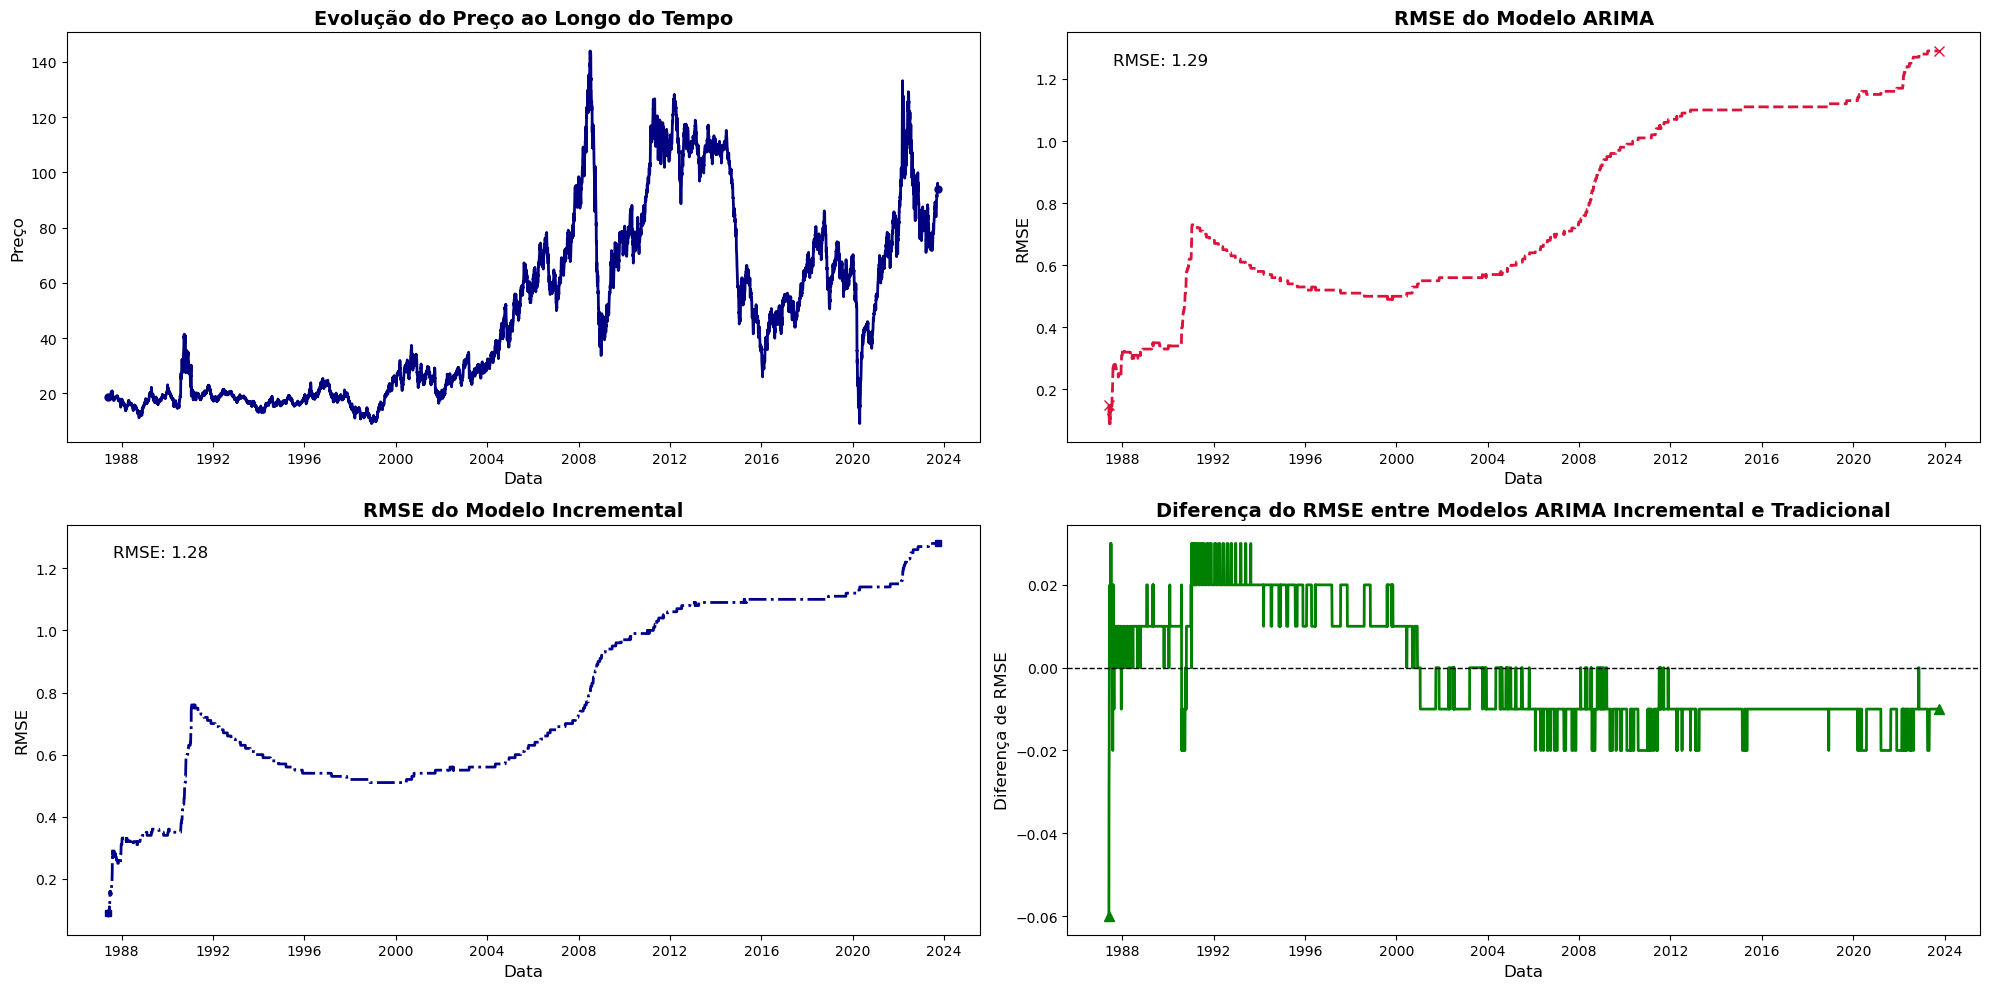

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Figura 1: Preço Real
axs[0, 0].plot(df['t'], df['price'], label='Preço Real', color='navy', linewidth=2, marker='o', markevery=[0, -1], markersize=5)
axs[0, 0].set_xlabel('Data', fontsize=12)
axs[0, 0].set_ylabel('Preço', fontsize=12)
axs[0, 0].set_title('Evolução do Preço ao Longo do Tempo', fontsize=14, fontweight='bold')

# Figura 2: Erro Absoluto ARIMA
axs[0, 1].plot(df['t'], df['arima_rmse'], label='RMSE ARIMA', color='crimson', linestyle='--', linewidth=2, marker='x', markevery=[0, -1], markersize=7)
axs[0, 1].set_xlabel('Data', fontsize=12)
axs[0, 1].set_ylabel('RMSE', fontsize=12)
axs[0, 1].set_title('RMSE do Modelo ARIMA', fontsize=14, fontweight='bold')
axs[0, 1].text(0.05, 0.95, f'RMSE: {arima_rmse}', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top')

# Figura 3: Erro Absoluto Incremental
axs[1, 0].plot(df['t'], df['incr_rmse'], label='RMSE Incremental', color='darkblue', linestyle='-.', linewidth=2, marker='s', markevery=[0, -1], markersize=5)
axs[1, 0].set_xlabel('Data', fontsize=12)
axs[1, 0].set_ylabel('RMSE', fontsize=12)
axs[1, 0].set_title('RMSE do Modelo Incremental', fontsize=14, fontweight='bold')
axs[1, 0].text(0.05, 0.95, f'RMSE: {incr_rmse}', transform=axs[1, 0].transAxes, fontsize=12, verticalalignment='top')

# Figura 4: Diferença de Erro Absoluto
axs[1, 1].plot(df['t'], df['dif_rmse'], label='Diferença de Erro Absoluto', color='green', linestyle='-', linewidth=2, marker='^', markevery=[0, -1], markersize=7)
axs[1, 1].set_xlabel('Data', fontsize=12)
axs[1, 1].set_ylabel('Diferença de RMSE', fontsize=12)
axs[1, 1].set_title('Diferença do RMSE entre Modelos ARIMA Incremental e Tradicional', fontsize=14, fontweight='bold')
# Linha de base y=0
axs[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.savefig('../imagens/rmse_tempo.png')

plt.tight_layout()
plt.show()


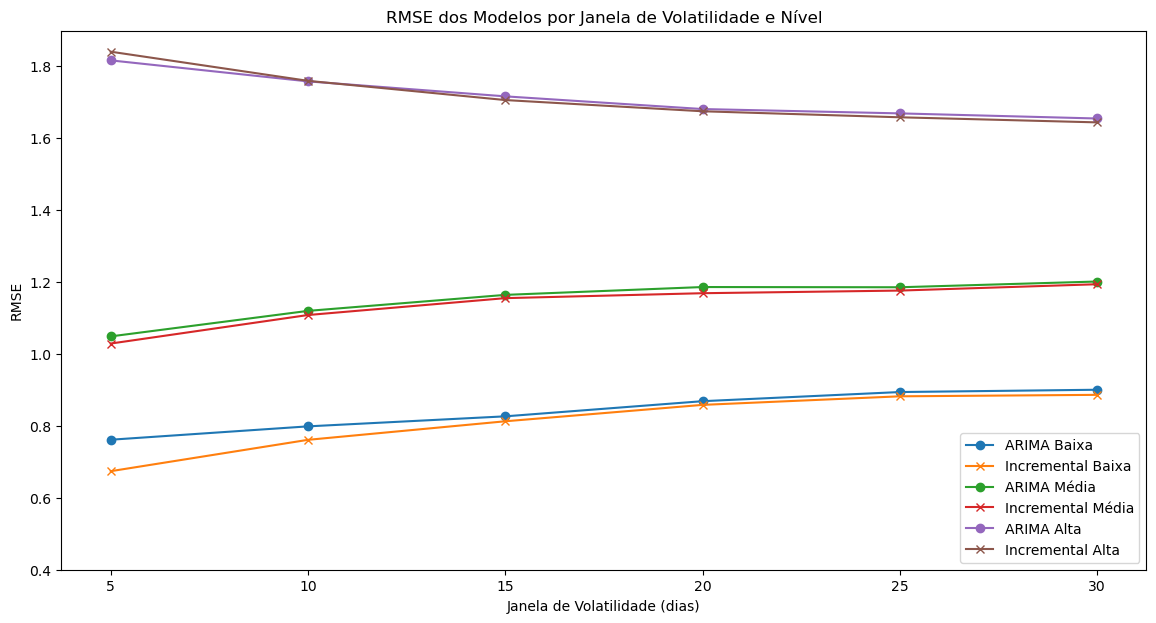

In [11]:
# Exemplo simplificado de como calcular o RMSE para diferentes janelas de volatilidade e plotar
janelas = range(5, 31, 5)  # Janelas de 5 a 30 dias
categorias_vol = ['Baixa', 'Média', 'Alta']  # Categorias de volatilidade
rmse_arima = pd.DataFrame(index=janelas, columns=categorias_vol)
rmse_incr = pd.DataFrame(index=janelas, columns=categorias_vol)

for janela in janelas:
    # Supondo que df['returns'] já esteja calculado
    df['volatilidade'] = df['returns'].rolling(window=janela).std()
    
    # Categorias de volatilidade
    limiar_baixo = df['volatilidade'].quantile(1/3)
    limiar_alto = df['volatilidade'].quantile(2/3)
    
    for categoria in categorias_vol:
        if categoria == 'Baixa':
            df_filtrado = df[df['volatilidade'] <= limiar_baixo]
        elif categoria == 'Média':
            df_filtrado = df[(df['volatilidade'] > limiar_baixo) & (df['volatilidade'] <= limiar_alto)]
        else:  # Alta
            df_filtrado = df[df['volatilidade'] > limiar_alto]
        
        # Calculando RMSE para cada modelo e categoria
        rmse_arima.loc[janela, categoria] = np.sqrt(np.mean(np.square(df_filtrado['price'] - df_filtrado['forecast'])))
        rmse_incr.loc[janela, categoria] = np.sqrt(np.mean(np.square(df_filtrado['price'] - df_filtrado['incr_nowcast'])))

# Plotando os resultados
plt.figure(figsize=(14, 7))

for categoria in categorias_vol:
    plt.plot(rmse_arima.index, rmse_arima[categoria], marker='o', label=f'ARIMA {categoria}')
    plt.plot(rmse_incr.index, rmse_incr[categoria], marker='x', label=f'Incremental {categoria}')

plt.title('RMSE dos Modelos por Janela de Volatilidade e Nível')
plt.xlabel('Janela de Volatilidade (dias)')
plt.ylabel('RMSE')
plt.gca().set_ylim(bottom=0.4)
plt.legend(loc='lower right')

plt.savefig('../imagens/rmse_volatilidade.png')

plt.show()